In [1]:
from pymongo import MongoClient
import urllib.request
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket

In [2]:
db =MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

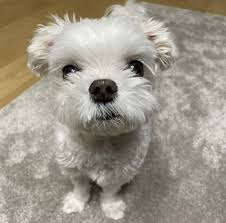

In [3]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5muKTTN9S02W78yYT6vugq8w6WLbNFbjw4g&usqp=CAU'
data = urllib.request.urlopen(url).read()
Image.open(BytesIO(data))

In [4]:
#MongoDB로 파일을 업로드할 객체 생성
bucket = GridFSBucket(db)
p_bucket = bucket
# p_bucket

In [5]:
grid_in = bucket.open_upload_stream('dog.jpg', metadata={'contentType' : 'image/jpg'})
# grid_in

In [6]:
grid_in.write(data)
grid_in.close()

In [7]:
image_list = list(db.fs.files.find())
image_list

[{'_id': ObjectId('63608dc0c282fbd0865536bd'),
  'filename': 'test.txt',
  'chunkSize': 261120,
  'length': 46,
  'uploadDate': datetime.datetime(2022, 11, 1, 3, 8, 48, 851000)},
 {'_id': ObjectId('636093a722f74fa434f6deba'),
  'filename': 'result.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'length': 123584,
  'uploadDate': datetime.datetime(2022, 11, 1, 3, 34, 33, 900000)},
 {'_id': ObjectId('6361b9da50e90292cddca6e3'),
  'filename': 'dog.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'length': 6784,
  'uploadDate': datetime.datetime(2022, 11, 2, 0, 29, 15, 70000)},
 {'_id': ObjectId('6361f98f4ef862a4ec39e6cb'),
  'filename': 'dog.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'length': 6784,
  'uploadDate': datetime.datetime(2022, 11, 2, 5, 1, 3, 437000)}]

In [8]:
real_img = Image.open(BytesIO(data))
real_img.show()